In [1]:
import pandas as pd
import numpy as np
import os
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit import rdBase
from rdkit.Chem import Descriptors

In [2]:
x1=pd.read_csv("/Users/ajaniharesh/Desktop/MLTest/Bromodomain/BRD4.csv", sep=";")

In [3]:
x1.shape

(13122, 47)

In [4]:
x1.columns

Index(['Molecule ChEMBL ID', 'Molecule Name', 'Molecule Max Phase',
       'Molecular Weight', '#RO5 Violations', 'AlogP', 'Compound Key',
       'Smiles', 'Standard Type', 'Standard Relation', 'Standard Value',
       'Standard Units', 'pChEMBL Value', 'Data Validity Comment', 'Comment',
       'Uo Units', 'Ligand Efficiency BEI', 'Ligand Efficiency LE',
       'Ligand Efficiency LLE', 'Ligand Efficiency SEI', 'Potential Duplicate',
       'Assay ChEMBL ID', 'Assay Description', 'Assay Type', 'BAO Format ID',
       'BAO Label', 'Assay Organism', 'Assay Tissue ChEMBL ID',
       'Assay Tissue Name', 'Assay Cell Type', 'Assay Subcellular Fraction',
       'Assay Parameters', 'Assay Variant Accession', 'Assay Variant Mutation',
       'Target ChEMBL ID', 'Target Name', 'Target Organism', 'Target Type',
       'Document ChEMBL ID', 'Source ID', 'Source Description',
       'Document Journal', 'Document Year', 'Cell ChEMBL ID', 'Properties',
       'Action Type', 'Standard Text Value'],
 

In [5]:
# Create a Binary Dataset for Bioactivity prediction for BRD4

#Active <= 10000 nM (Label=1)
#Inactive > 20000 nM (Label=0)

x=x1[['Molecule ChEMBL ID','Smiles','Standard Type','Standard Value','Standard Units']]

In [6]:
x

,Molecule ChEMBL ID,Smiles,Standard Type,Standard Value,Standard Units
0,CHEMBL3409986,Nc1ccc(NS(=O)(=O)c2cccc(-c3csc(=O)[nH]3)c2)cc1,IC50,8330.00,nM
1,CHEMBL3409989,O=c1[nH]c(-c2cccc(S(=O)(=O)NCCc3cccs3)c2)cs1,IC50,10000.00,nM
2,CHEMBL3409991,O=c1[nH]c(-c2cccc(S(=O)(=O)NC3CCOC3)c2)cs1,IC50,5820.00,nM
3,CHEMBL3409992,Cc1ccc(-c2csc(=O)[nH]2)cc1S(=O)(=O)NC1CCCC1,Delta Tm,6.30,degrees C
4,CHEMBL1958335,CN1N=C(c2ccccc2)c2cc(Cl)ccc2NC1=S,Delta Tm,2.00,degrees C
...,...,...,...,...,...
13117,CHEMBL3648680,Cn1ncc(NC(=O)c2nc(-c3c(F)cccc3F)sc2N)c1N1CC[C@...,Delta TM,-1.02,C
13118,CHEMBL5303458,O=C(Nc1cccc(COc2cc(F)c(Br)cc2CN2CC[C@H](O)C2)c...,Delta TM,-0.07,C
13119,CHEMBL426972,CC(C)c1cnc(NC(=O)Cc2ccccc2)s1,Delta TM,-1.14,C
13120,CHEMBL2216824,Cc1cc(NC(=O)c2cccc(NC(=O)/C=C/CN(C)C)c2)ccc1Nc...,Delta TM,-1.31,C


In [7]:
x=x[x['Smiles'].notna()]

In [8]:
x.shape

(13121, 5)

In [9]:
x["Smiles"].str.contains(".").value_counts(sort=True)   

Smiles
True    13121
Name: count, dtype: int64

In [10]:
x=x[x["Standard Units"].notna()]
x.shape

(12511, 5)

In [11]:
x=x[x["Standard Units"].str.contains("nM")]

In [12]:
x.shape

(8396, 5)

In [13]:
x["Standard Type"].value_counts()

Standard Type
IC50        5861
Ki          1669
Kd           660
EC50         154
DC50          49
K              2
Activity       1
Name: count, dtype: int64

In [14]:
x.head()

,Molecule ChEMBL ID,Smiles,Standard Type,Standard Value,Standard Units
0,CHEMBL3409986,Nc1ccc(NS(=O)(=O)c2cccc(-c3csc(=O)[nH]3)c2)cc1,IC50,8330.0,nM
1,CHEMBL3409989,O=c1[nH]c(-c2cccc(S(=O)(=O)NCCc3cccs3)c2)cs1,IC50,10000.0,nM
2,CHEMBL3409991,O=c1[nH]c(-c2cccc(S(=O)(=O)NC3CCOC3)c2)cs1,IC50,5820.0,nM
5,CHEMBL4099010,CCS(=O)(=O)Nc1ccc2c(c1)-c1cn(C)c(=O)cc1OCCCCc1...,EC50,6.5,nM
6,CHEMBL4068431,CCS(=O)(=O)Nc1cnc2c(c1)-c1cn(C)c(=O)cc1OCCCCc1...,EC50,6.4,nM


In [15]:
x["Molecule ChEMBL ID"].value_counts()

Molecule ChEMBL ID
CHEMBL1957266    170
CHEMBL1232461     59
CHEMBL2393130     52
CHEMBL2017291     32
CHEMBL3581647     32
                ... 
CHEMBL4643632      1
CHEMBL4637378      1
CHEMBL4644443      1
CHEMBL4632925      1
CHEMBL5182437      1
Name: count, Length: 4964, dtype: int64

In [16]:
CHEMBL1957266=x[x["Molecule ChEMBL ID"].str.contains("CHEMBL1957266")]

In [17]:
CHEMBL1957266["Standard Value"].min(),CHEMBL1957266["Standard Value"].max(),CHEMBL1957266["Standard Value"].mean()

(3.9, 81500.0, 597.7187647058823)

In [18]:
CHEMBL1957266.columns

Index(['Molecule ChEMBL ID', 'Smiles', 'Standard Type', 'Standard Value',
       'Standard Units'],
      dtype='object')

In [19]:
CHEMBL1957266["New_Std Value"]=CHEMBL1957266[['Molecule ChEMBL ID', 'Smiles', 'Standard Type', 'Standard Value',
       'Standard Units']].groupby(['Molecule ChEMBL ID'])["Standard Value"].transform("mean")

/var/folders/05/1c70fqnn7xn75w5t6t36d1tw0000gn/T/ipykernel_6106/2021856326.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CHEMBL1957266["New_Std Value"]=CHEMBL1957266[['Molecule ChEMBL ID', 'Smiles', 'Standard Type', 'Standard Value',


In [20]:
CHEMBL1957266.head()

,Molecule ChEMBL ID,Smiles,Standard Type,Standard Value,Standard Units,New_Std Value
118,CHEMBL1957266,Cc1sc2c(c1C)C(c1ccc(Cl)cc1)=N[C@@H](CC(=O)OC(C...,IC50,14.0,nM,597.718765
209,CHEMBL1957266,Cc1sc2c(c1C)C(c1ccc(Cl)cc1)=N[C@@H](CC(=O)OC(C...,IC50,77.0,nM,597.718765
356,CHEMBL1957266,Cc1sc2c(c1C)C(c1ccc(Cl)cc1)=N[C@@H](CC(=O)OC(C...,Ki,12.0,nM,597.718765
357,CHEMBL1957266,Cc1sc2c(c1C)C(c1ccc(Cl)cc1)=N[C@@H](CC(=O)OC(C...,Ki,14.9,nM,597.718765
378,CHEMBL1957266,Cc1sc2c(c1C)C(c1ccc(Cl)cc1)=N[C@@H](CC(=O)OC(C...,IC50,144.0,nM,597.718765


In [21]:
x["New_Std Value"]=x[['Molecule ChEMBL ID', 'Smiles', 'Standard Type', 'Standard Value',
       'Standard Units']].groupby(['Molecule ChEMBL ID'])["Standard Value"].transform("mean")

In [22]:
x.head()

,Molecule ChEMBL ID,Smiles,Standard Type,Standard Value,Standard Units,New_Std Value
0,CHEMBL3409986,Nc1ccc(NS(=O)(=O)c2cccc(-c3csc(=O)[nH]3)c2)cc1,IC50,8330.0,nM,8330.0
1,CHEMBL3409989,O=c1[nH]c(-c2cccc(S(=O)(=O)NCCc3cccs3)c2)cs1,IC50,10000.0,nM,10000.0
2,CHEMBL3409991,O=c1[nH]c(-c2cccc(S(=O)(=O)NC3CCOC3)c2)cs1,IC50,5820.0,nM,5820.0
5,CHEMBL4099010,CCS(=O)(=O)Nc1ccc2c(c1)-c1cn(C)c(=O)cc1OCCCCc1...,EC50,6.5,nM,4.0
6,CHEMBL4068431,CCS(=O)(=O)Nc1cnc2c(c1)-c1cn(C)c(=O)cc1OCCCCc1...,EC50,6.4,nM,3.6


In [23]:
x=x.drop_duplicates("Molecule ChEMBL ID",keep="first")

In [24]:
x.shape

(4964, 6)

In [25]:
x.to_csv("BRD4-cleaned.csv", index=None)

In [26]:
active=x.loc[x["New_Std Value"] <= 10000]
inactive=x.loc[x["New_Std Value"] > 20000]

In [27]:
active["Label"]=1
inactive["Label"]=0

/var/folders/05/1c70fqnn7xn75w5t6t36d1tw0000gn/T/ipykernel_6106/1000682513.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active["Label"]=1
/var/folders/05/1c70fqnn7xn75w5t6t36d1tw0000gn/T/ipykernel_6106/1000682513.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inactive["Label"]=0


In [28]:
active.head()

,Molecule ChEMBL ID,Smiles,Standard Type,Standard Value,Standard Units,New_Std Value,Label
0,CHEMBL3409986,Nc1ccc(NS(=O)(=O)c2cccc(-c3csc(=O)[nH]3)c2)cc1,IC50,8330.0,nM,8330.0,1
1,CHEMBL3409989,O=c1[nH]c(-c2cccc(S(=O)(=O)NCCc3cccs3)c2)cs1,IC50,10000.0,nM,10000.0,1
2,CHEMBL3409991,O=c1[nH]c(-c2cccc(S(=O)(=O)NC3CCOC3)c2)cs1,IC50,5820.0,nM,5820.0,1
5,CHEMBL4099010,CCS(=O)(=O)Nc1ccc2c(c1)-c1cn(C)c(=O)cc1OCCCCc1...,EC50,6.5,nM,4.0,1
6,CHEMBL4068431,CCS(=O)(=O)Nc1cnc2c(c1)-c1cn(C)c(=O)cc1OCCCCc1...,EC50,6.4,nM,3.6,1


In [29]:
combined=pd.concat([active,inactive],axis=0)

In [30]:
combined.tail()

,Molecule ChEMBL ID,Smiles,Standard Type,Standard Value,Standard Units,New_Std Value,Label
12694,CHEMBL5177096,Nc1nnc(-c2ccccc2O)cc1-c1ccccc1,IC50,27000.00,nM,27000.00,0
12715,CHEMBL5088467,Cc1cnc2c(-c3ccc(C(=O)N(c4ncccc4C)[C@@H]4CCCNC4...,IC50,25000.00,nM,25000.00,0
12760,CHEMBL5220338,Cc1noc(C)c1C(=O)Nc1nnc(C2CC2)s1,IC50,86000.00,nM,86000.00,0
12781,CHEMBL197512,Cc1n[nH]c2nnc(N)c-2c1C,IC50,72000.00,nM,72000.00,0
12790,CHEMBL5084768,Cc1nnc2c(N)cc(C(=O)N3[C@H]4Cc5ccccc5[C@@H]3CNC...,IC50,25118.86,nM,25118.86,0


In [31]:
combined[["Smiles","Label"]].to_csv("BRD4-labelled.smi", index=None, header=False)

In [32]:
# Generate Molecular Fetures

t1=Chem.SmilesMolSupplier("BRD4-labelled.smi", delimiter="," ,titleLine=False)

In [33]:
ids, fp= [], []

for i, mol in enumerate(t1):
    ids.append(mol.GetProp("_Name"))
    fp.append(AllChem.GetMorganFingerprintAsBitVect(mol,2,nBits=2048))

[14:44:48] DEPRECATION WARNING: please use MorganGenerator
[14:44:48] DEPRECATION WARNING: please use MorganGenerator
[14:44:48] DEPRECATION WARNING: please use MorganGenerator
[14:44:48] DEPRECATION WARNING: please use MorganGenerator
[14:44:48] DEPRECATION WARNING: please use MorganGenerator
[14:44:48] DEPRECATION WARNING: please use MorganGenerator
[14:44:48] DEPRECATION WARNING: please use MorganGenerator
[14:44:48] DEPRECATION WARNING: please use MorganGenerator
[14:44:48] DEPRECATION WARNING: please use MorganGenerator
[14:44:48] DEPRECATION WARNING: please use MorganGenerator
[14:44:48] DEPRECATION WARNING: please use MorganGenerator
[14:44:48] DEPRECATION WARNING: please use MorganGenerator
[14:44:48] DEPRECATION WARNING: please use MorganGenerator
[14:44:48] DEPRECATION WARNING: please use MorganGenerator
[14:44:48] DEPRECATION WARNING: please use MorganGenerator
[14:44:48] DEPRECATION WARNING: please use MorganGenerator
[14:44:48] DEPRECATION WARNING: please use MorganGenerat

In [34]:
morgen_fp=np.asarray(fp,dtype=np.int32)
labels=np.asarray(ids,dtype=np.int32).reshape(-1,1)

In [35]:
morgen_fp

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [36]:
labels

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]], dtype=int32)

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

from sklearn import tree
import graphviz
#from Ipyhon.display import image

In [38]:
X_train, X_test, y_train, y_test = train_test_split(morgen_fp, labels,test_size=0.25, random_state=42, shuffle=True, stratify=labels)

In [39]:
y_test

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [0]], dtype=int32)

In [41]:
# Build an Ensemble model for Bioactivity Model

#Random Forest
#SVM
#KNN
#NB
#GB

#Ensemble

# Random Forest

rf_clf=RandomForestClassifier()

rf_clf=rf_clf.fit(X_train,y_train.ravel())

predicted=rf_clf.predict(X_test)
roc_auc_score(y_test,predicted)

0.7359238008418907

In [42]:
#Hyperparameters Tuning --- Random Forest

from sklearn.model_selection import GridSearchCV

params_grid={"n_estimators":[100,200,1000,2000], "max_depth":[10,50,100]}

rf_clf=RandomForestClassifier()

rf_clf=GridSearchCV(estimator=rf_clf,param_grid=params_grid,cv=5, verbose=1)

rf_clf.fit(X_train, y_train.ravel())
rf_clf.best_estimator_

Fitting 5 folds for each of 12 candidates, totalling 60 fits


RandomForestClassifier(max_depth=100, n_estimators=200)

In [43]:
#Final Random Forest Model

rf_clf=RandomForestClassifier(max_depth=100, n_estimators=200, random_state=42)
rf_clf=rf_clf.fit(X_train,y_train.ravel())
predicted=rf_clf.predict(X_test)
roc_auc_score(y_test, predicted)

0.7420402445236882

In [92]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

In [93]:
y_pred = rf_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9174714661984197
Precision: 0.9281609195402298
Recall: 0.9807692307692307


In [44]:
# Support Vector Machine  model

from sklearn import svm

svm_clf = svm.SVC() # Linear Kernel #Create a svm Classifier

svm_clf=svm_clf.fit(X_train, y_train.ravel())  #Train the model using the training sets

predicted = svm_clf.predict(X_test) #Predict the response for test dataset

roc_auc_score(y_test, predicted)

0.776164973054133

In [45]:
#Hyperparameters Tuning --- SVM

from sklearn.model_selection import GridSearchCV 
  
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  # defining parameter range 

svc_clf=svm.SVC()

svc_clf=GridSearchCV(estimator=svc_clf, param_grid=param_grid, refit = True, verbose = 3) 

svc_clf.fit(X_train, y_train.ravel()) # fitting the model for grid search
svc_clf.best_estimator_

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.867 total time=   4.6s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.868 total time=   4.4s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.868 total time=   4.4s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.868 total time=   4.6s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.868 total time=   4.6s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.867 total time=   4.3s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.868 total time=   4.3s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.868 total time=   4.3s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.868 total time=   4.4s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.868 total time=   4.2s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.867 total time=   1.6s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

SVC(C=10, gamma=0.01)

In [46]:
# Final Model After Hyperparameter Optimization
svm_clf = svm.SVC(C=10, gamma=0.01) # Linear Kernel 

svm_clf=svm_clf.fit(X_train, y_train.ravel())
predicted = svm_clf.predict(X_test)

roc_auc_score(y_test, predicted)

0.8169557873287396

In [94]:
y_pred = svm_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9306409130816505
Precision: 0.9495548961424333
Recall: 0.97165991902834


In [89]:
from sklearn.metrics import RocCurveDisplay

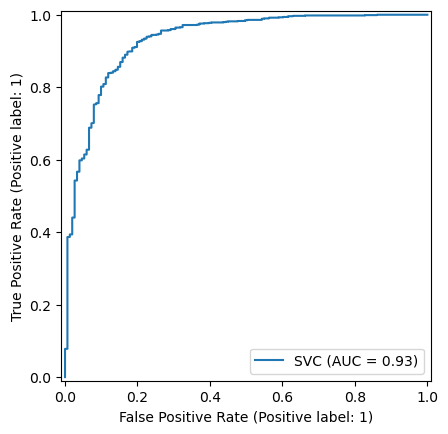

In [90]:
svc_disp = RocCurveDisplay.from_estimator(svm_clf, X_test, y_test)
plt.show()

In [47]:
# K-Nearest Neighbors (KNN) model

from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()  # Build a KNeighbors Classifier


knn_clf=knn_clf.fit(X_train, y_train.ravel())  # Model training


predicted = knn_clf.predict(X_test)  # Predict Output

roc_auc_score(y_test,predicted )

0.8065159396198085

In [95]:
y_pred = knn_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9271290605794557
Precision: 0.9466929911154985
Recall: 0.9706477732793523


In [51]:
# Gradient Boosting Classifier model

from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier() # Build a GradientBoosting Classifier

gb_clf= gb_clf.fit(X_train, y_train.ravel()) # Model training

predicted = gb_clf.predict(X_test) # Predict Output

roc_auc_score(y_test,predicted )

0.6877731452931871

In [96]:
y_pred = gb_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9060579455662863
Precision: 0.9136150234741784
Recall: 0.9848178137651822


In [49]:
# Naive Bayes Classifier (NB)  model

from sklearn.naive_bayes import GaussianNB

nb_clf = GaussianNB() # Build a Gaussian Classifier

nb_clf= nb_clf.fit(X_train, y_train.ravel()) # Model training

predicted = nb_clf.predict(X_test) # Predict Output

roc_auc_score(y_test,predicted )

0.6945431267930395

In [52]:
# Build Ensemble Model for BRD4 Biactivity Predictors

# RF + SVM + KNN + 

# RF = rf_clf
# SVM = svm_clf
# KNN = knn_clf
# GB = gb_clf

from sklearn.ensemble import VotingClassifier
estimators=[("rf", rf_clf), ("SVM", svm_clf), ("KNN", knn_clf)]

ensemble=  VotingClassifier(estimators, voting="hard")
ensemble_clf= ensemble.fit(X_train, y_train.ravel())
predicted= ensemble_clf.predict(X_test) 
roc_auc_score(y_test,predicted)

0.800124674906829

In [97]:
y_pred = ensemble_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9306409130816505
Precision: 0.9442815249266863
Recall: 0.9777327935222672


In [73]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
from sklearn.metrics import ConfusionMatrixDisplay

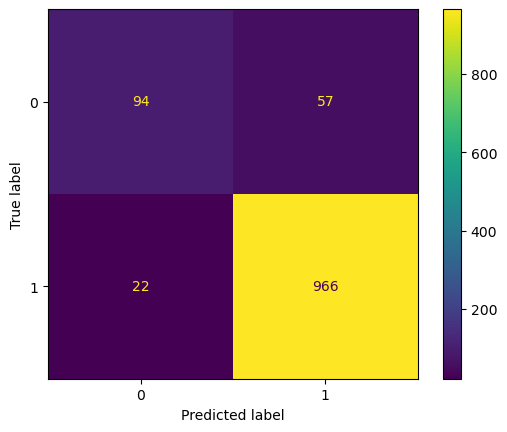

In [74]:
cm = confusion_matrix(y_test, predicted)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [78]:
y_pred_prob = rf_clf.predict_proba(X_test)[:, 1] 

In [80]:
from sklearn.metrics import roc_curve, roc_auc_score 

In [81]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label=1)

In [82]:
roc_auc = roc_auc_score(y_test, y_pred_prob) 
roc_auc

0.9366235890286082

In [84]:
import matplotlib.pyplot as plt

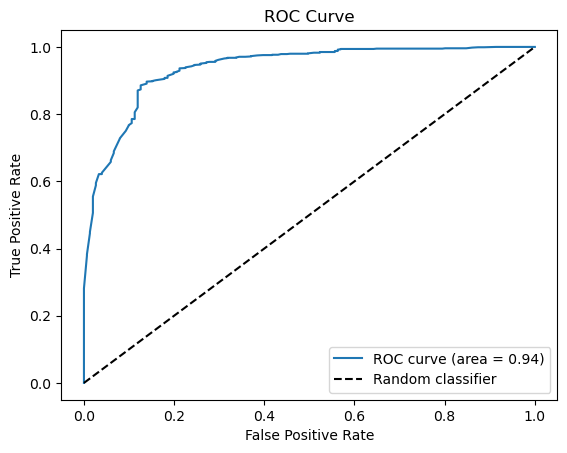

In [85]:
# Plot the ROC curve 
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc) 
# roc curve for tpr = fpr  
plt.plot([0, 1], [0, 1], 'k--', label='Random classifier') 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('ROC Curve') 
plt.legend(loc="lower right") 
plt.show()

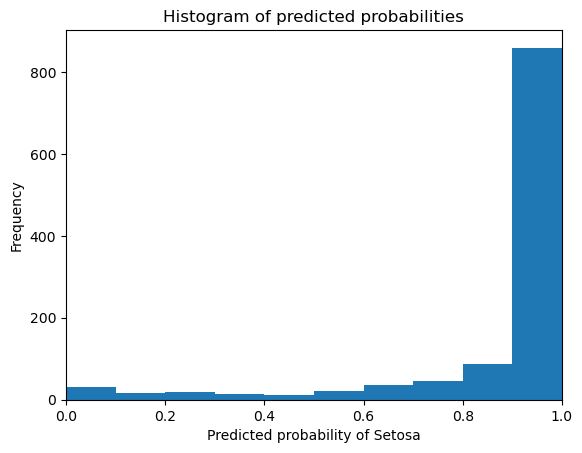

In [86]:
# Plot the predicted class probabilities 
plt.hist(y_pred_prob, bins=10) 
plt.xlim(0, 1) 
plt.title('Histogram of predicted probabilities') 
plt.xlabel('Predicted probability of Setosa') 
plt.ylabel('Frequency') 
plt.show() 

In [76]:
from matplotlib.legend_handler import HandlerLine2D

In [ ]:
line1= plt.plt(n_estimators) 

In [53]:
y=pd.read_csv("/Users/ajaniharesh/Desktop/MLTest/Bromodomain/Enamine.csv",sep=";")

In [54]:
y.shape

(15360, 2)

In [55]:
y=y[y["Smiles"].notna()]

In [56]:
y.shape

(15360, 2)

In [57]:
y=y.drop_duplicates("Smiles", keep="first")

In [58]:
y[["Smiles","Compound_ID"]].to_csv("enamine.smi", index=None,header=False, sep="\t")

In [59]:
# Generate Molecular Fetures

t1=Chem.SmilesMolSupplier("enamine.smi", delimiter="\t" ,titleLine=False)

In [60]:
ids, fp= [], []

for i, mol in enumerate(t1):
    ids.append(mol.GetProp("_Name"))
    fp.append(AllChem.GetMorganFingerprintAsBitVect(mol,2,nBits=2048))

[15:43:02] DEPRECATION WARNING: please use MorganGenerator
[15:43:02] DEPRECATION WARNING: please use MorganGenerator
[15:43:02] DEPRECATION WARNING: please use MorganGenerator
[15:43:02] DEPRECATION WARNING: please use MorganGenerator
[15:43:02] DEPRECATION WARNING: please use MorganGenerator
[15:43:02] DEPRECATION WARNING: please use MorganGenerator
[15:43:02] DEPRECATION WARNING: please use MorganGenerator
[15:43:02] DEPRECATION WARNING: please use MorganGenerator
[15:43:02] DEPRECATION WARNING: please use MorganGenerator
[15:43:02] DEPRECATION WARNING: please use MorganGenerator
[15:43:02] DEPRECATION WARNING: please use MorganGenerator
[15:43:02] DEPRECATION WARNING: please use MorganGenerator
[15:43:02] DEPRECATION WARNING: please use MorganGenerator
[15:43:02] DEPRECATION WARNING: please use MorganGenerator
[15:43:02] DEPRECATION WARNING: please use MorganGenerator
[15:43:02] DEPRECATION WARNING: please use MorganGenerator
[15:43:02] DEPRECATION WARNING: please use MorganGenerat

In [61]:
morgen_fp=np.asarray(fp,dtype=np.int32)

In [62]:
labels=np.asarray(ids,dtype=np.int32).reshape(-1,1)

ValueError: invalid literal for int() with base 10: 'Z1269664718'

In [63]:
morgen_fp

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [64]:
labels

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]], dtype=int32)

In [65]:
Data_Predicted=ensemble_clf.predict(morgen_fp)

In [66]:
pd.DataFrame(Data_Predicted.reshape(-1,1))

,0
0,1
1,1
2,0
3,1
4,0
...,...
15355,0
15356,1
15357,0
15358,1


In [67]:
pd.DataFrame(Data_Predicted.reshape(-1,1)).value_counts()

0
0    8451
1    6909
Name: count, dtype: int64

In [75]:
cm = confusion_matrix(y_test, Data_Predicted)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

ValueError: Found input variables with inconsistent numbers of samples: [1139, 15360]